<a href="https://colab.research.google.com/github/quochungtran/NLP-with-Disaster-Tweets/blob/master/Tweet_NLP_disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mout with gg drive**

In [1]:
# connect gitlab to drive to be a place to store data
# from google.colab import drive
# drive.mount("/content/drive")

In [2]:
# cd /content/drive/MyDrive/NLP-with-Disaster-Tweets


# **Setting up** 

In [1]:
pwd

'/home/quochungtran/Desktop/ML_project/NLP-with-Disaster-Tweets/notebooks'

In [2]:
#Importing the required libraries to read,visualize and model the givn dataset files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import missingno as msno 
import warnings
import os

warnings.filterwarnings("ignore")
import re
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
import nltk
from nltk.tokenize import word_tokenize,RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from platform import python_version
print (python_version())

/tmp/ipykernel_4237/2045328142.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


3.9.18


In [3]:
cd ..

/home/quochungtran/Desktop/ML_project/NLP-with-Disaster-Tweets


# **Prolem statement** 

1. Data exploratory analysis: This section will cover the basics of data exploration. 


2. Data preprocessing: This section will cover the basics of data cleaning and preparation, such as removing missing values and splitting the data into train and test sets.

3. Text processing and feature extraction: This section will cover the basics of text processing and feature extraction using NLP techniques, such as tokenization, stopword removal, and stemming. It will also introduce the concept of feature engineering, such as creating new features based on existing data.

4. Machine learning model selection: This section will cover the basics of selecting a machine learning model and evaluating its performance, such as using different models, hyperparameter tuning, and model selection based on performance metrics.

5. Model evaluation and performance: This section will cover the basics of evaluating the performance of a machine learning model, such as using metrics like accuracy, precision, recall, and F1-score, and understanding the trade-offs between different metrics.

In [4]:
# import the configuration of the notebooks
import importlib
import src.config as cfg
importlib.reload(cfg)

<module 'src.config' from '/home/quochungtran/Desktop/ML_project/NLP-with-Disaster-Tweets/src/config.py'>

In [5]:
df_train = pd.read_csv(cfg.TRAINING_FILE)
df_test  = pd.read_csv(cfg.TESTING_FILE)

In [6]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(tokenizer=word_tokenize, token_pattern=None )

In [12]:
df_train.text.values

array(['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
       'Forest fire near La Ronge Sask. Canada',
       "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
       ...,
       'M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ',
       'Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.',
       'The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/YmY4rSkQ3d'],
      dtype=object)

In [17]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     /home/quochungtran/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [27]:
corpus = [
    "hello, how are you?",
    "im getting bored at home. And you? What do you think?",
    "did you know about counts",
    "let's see if this works!",
    "YES!!!!"
]
# initialize CountVectorizer with word_tokenize from nltk
# as the tokenizer
ctv = CountVectorizer(tokenizer=word_tokenize, token_pattern=None)
# fit the vectorizer on corpus
ctv.fit(df_train.text)
x_train = ctv.transform(df_train.text.values)

In [28]:
x_train

<7613x23055 sparse matrix of type '<class 'numpy.int64'>'
	with 128533 stored elements in Compressed Sparse Row format>

## **Data exploratory analysis**



In [9]:
# data peeking 
print(f'Shape of the File : {df_train.shape}\n')
print(f'All the Columns of the Dataframe : \n\n{df_train.columns.values}')
# values methods save data under list form 

Shape of the File : (7613, 5)

All the Columns of the Dataframe : 

['id' 'keyword' 'location' 'text' 'target']


### Data description

- id - a unique identifier for each tweet

- text - the text of the tweet

- location - the location the tweet was sent from (may be blank)

- keyword - a particular keyword from the tweet (may be blank)

- target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)

Text(0.5, 1.0, 'Target Value Counts in training data set')

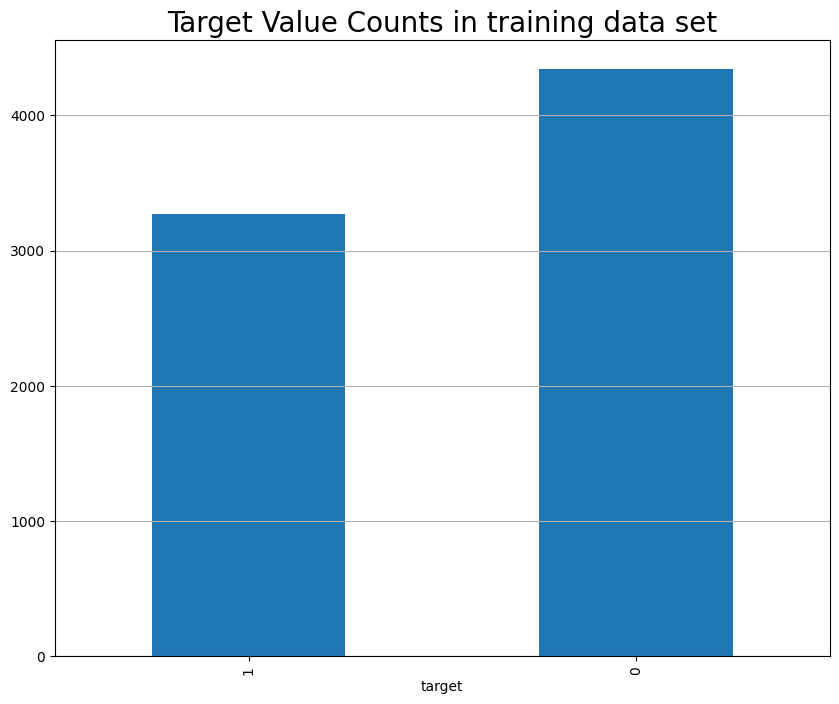

In [10]:
# ploting class distribution between train and test set
fig = plt.figure(figsize=(10,8))
ax = df_train['target'].value_counts().sort_values().plot(kind="bar")
ax.grid(axis="y")
ax.set_title("Target Value Counts in training data set", fontsize=20)

In [11]:
# missing data
def missing_values(df) :
    print("Number of data points in data set  : ", df.shape[0])
    print("Number of missing data for column keyword : ", df['keyword'].isna().sum())
    print("Number of missing data for column location: ", df['location'].isna().sum())
    print(f"{round(df.keyword.isnull().sum()/(df.shape[0])*100,2)} %  of missing keywork values in entire of data")
    print(f"{round(df.location.isnull().sum()/(df.shape[0])*100,2)} % of missing location values in entire of data")

In [12]:
missing_values(df_train)

Number of data points in data set  :  7613
Number of missing data for column keyword :  61
Number of missing data for column location:  2533
0.8 %  of missing keywork values in entire of data
33.27 % of missing location values in entire of data


In [13]:
missing_values(df_test)

Number of data points in data set  :  3263
Number of missing data for column keyword :  26
Number of missing data for column location:  1105
0.8 %  of missing keywork values in entire of data
33.86 % of missing location values in entire of data


In [14]:
# fill missing value to indicate 
for df in [df_train, df_test]:
    for col in ["keyword", "location"]:
        df[col] = df[col].fillna(f"no_{col}")

In [15]:
# check duplicate data 
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

0
0


### Keyword features

(array([  4.,   1.,   2.,  14.,  86., 107.,   7.,   0.,   0.,   1.]),
 array([ 9. , 14.2, 19.4, 24.6, 29.8, 35. , 40.2, 45.4, 50.6, 55.8, 61. ]),
 <BarContainer object of 10 artists>)

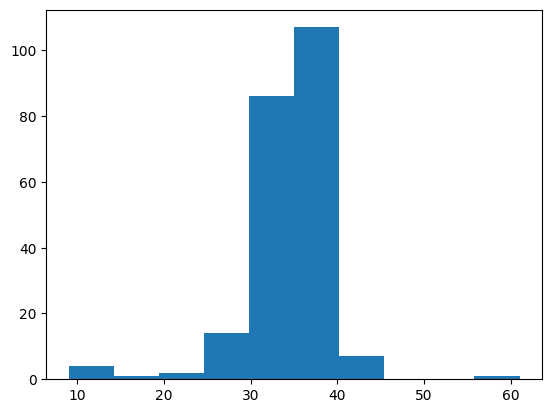

In [16]:
plt.hist(df_train["keyword"].value_counts())

In [17]:
# the most commently keyword appeared in our data set
feat=df_train['keyword'].value_counts()
print(feat.head())
fig = px.scatter(feat, x=feat.values, y=feat.index,size=feat.values)
fig.show()

keyword
no_keyword    61
fatalities    45
deluge        42
armageddon    42
sinking       41
Name: count, dtype: int64


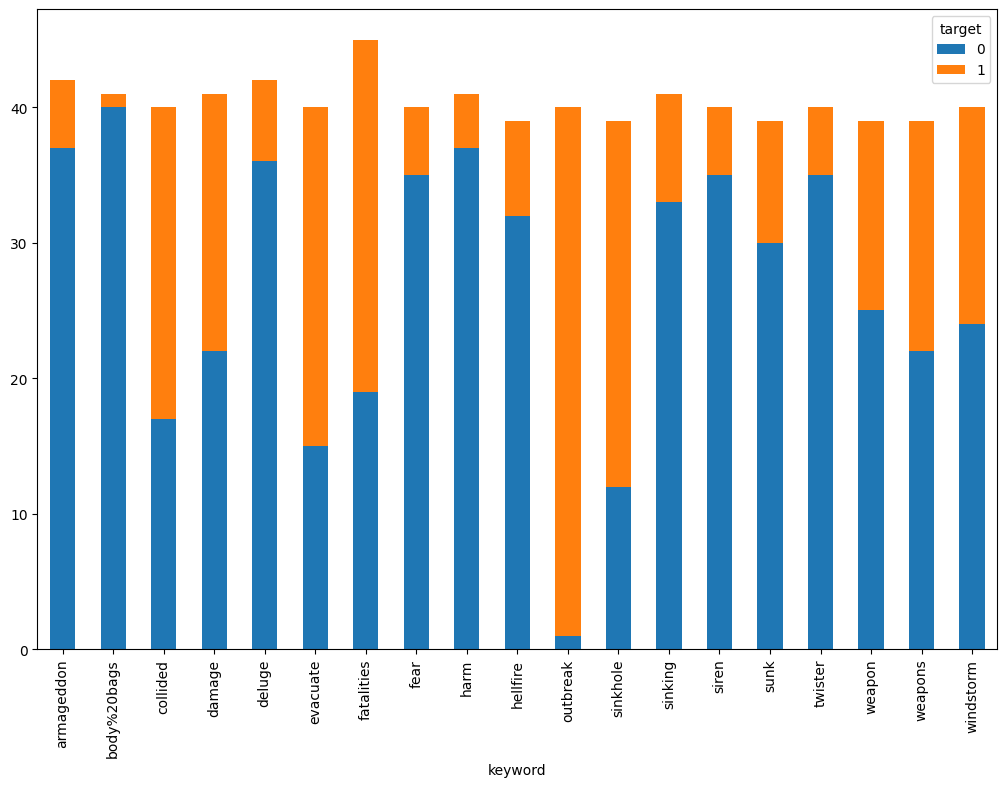

In [18]:
most_count_keyword   = df_train["keyword"].value_counts().keys()[1:20]
df_count_most_values = df_train[df_train.keyword.isin(most_count_keyword)]
grouped     = df_count_most_values.groupby(['keyword', 'target']).size().reset_index(name='Count')
pivot_table = grouped.pivot(index='keyword', columns='target', values='Count')

# Create a new figure object with a larger size
fig, ax = plt.subplots(figsize=(12, 8))
pivot_table.plot.bar(stacked=True, ax=ax)

# Adjust the subplot spacing
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.2)

plt.show()

Remark:
In data set:
- **outbreak** consided to be "real-disaster" word. 
- **amargedon, body%20bag, harm, sinking, twister** tend to "non-disaster" word 

### Location features

In [19]:
df_train['location'].value_counts()

location
no_location                     2533
USA                              104
New York                          71
United States                     50
London                            45
                                ... 
Surulere Lagos,Home Of Swagg       1
MontrÌ©al, QuÌ©bec                 1
Montreal                           1
ÌÏT: 6.4682,3.18287                1
Lincoln                            1
Name: count, Length: 3342, dtype: int64

In [20]:
# missing value are not visualized in the graph

feat=df_train['location'].value_counts()
print(feat.head())
fig = px.scatter(feat, x=feat.values, y=feat.index,size=feat.values)
fig.show()

location
no_location      2533
USA               104
New York           71
United States      50
London             45
Name: count, dtype: int64


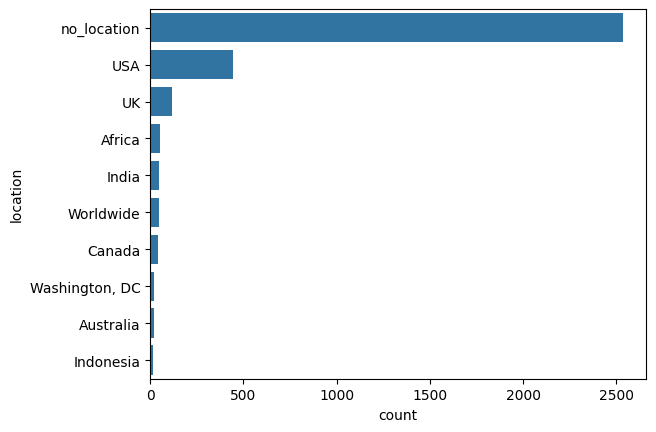

In [21]:
# Replacing the ambigious locations name with standard names and create a dictionary object
loc_dict = {"United States":'USA',
            "New York":'USA',
            "London":'UK',
            "Los Angeles, CA":'USA',
            "Washington, D.C.":'USA',
            "California":'USA',
            "Chicago, IL":'USA',
            "Chicago":'USA',
            "New York, NY":'USA',
            "California, USA":'USA',
            "FLorida":'USA',
            "San Francisco":'USA',
            "Florida":'USA',
            "Los Angeles":'USA',
            "San Francisco, CA":'USA',
            "NYC":'USA',
            "New York City":'USA',
            "Texas":'USA',
            "Atlanta, GA":'USA',
            "Seattle":'USA',

            "Nigeria":'Africa',
            "Kenya":'Africa',

            "Everywhere":'Worldwide',
            "Earth":'Worldwide',

            "Toronto":'Canada',

            "United Kingdom":'UK',
            "Ireland":'UK',
            "London, England":'UK',
            "London, UK":'UK',
            "Mumbai":"India"
            
            # todo             
}

# replace() method takes a dictionary that maps old values to new values. 
df_train['location'].replace(loc_dict,inplace=True)


#Create barchart for top 10 locations using seaborn
sns.barplot(y=df_train['location'].value_counts()[:10].index,x=df_train['location'].value_counts()[:10],
          orient='h');


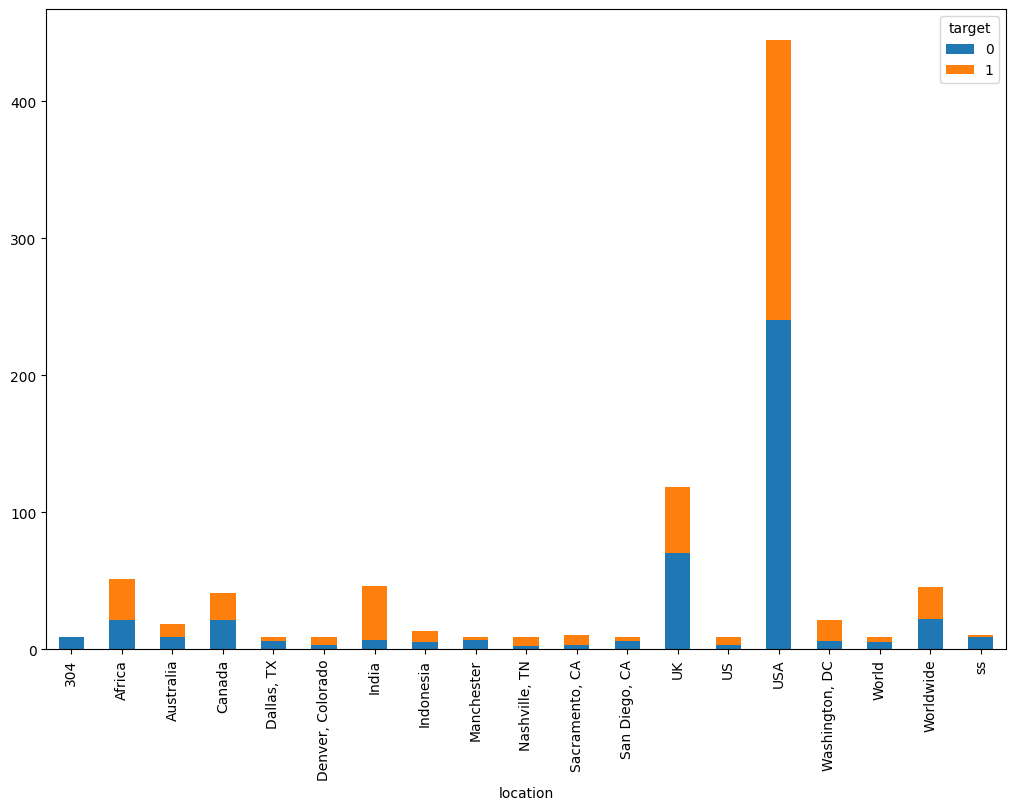

In [22]:
most_count_loc = df_train["location"].value_counts().keys()[1:20]
df_most_count_loc = df_train[df_train.location.isin(most_count_loc)]
grouped = df_most_count_loc.groupby(['location', 'target']).size().reset_index(name='Count')
pivot_table = grouped.pivot(index='location', columns='target', values='Count')

# Create a new figure object with a larger size
fig, ax = plt.subplots(figsize=(12, 8))
pivot_table.plot.bar(stacked=True, ax=ax)

# Adjust the subplot spacing
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.2)

plt.show()

Because it contains a large missing values in term of location features, we will drop and exculde this feature from further analysis and modeling  

In [23]:
df_train["location"].unique()

array(['no_location', 'Birmingham', 'Est. September 2012 - Bristol', ...,
       'Vancouver, Canada', 'London ', 'Lincoln'], dtype=object)

### Length of each tweet sentence

Investigate and visualize length of tweets in the file available.

In [24]:
df_train["tweet_len"] = df_train["text"].apply(lambda x : len(x))
df_train.head()

,id,keyword,location,text,target,tweet_len
0,1,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1,38
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1,133
3,6,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1,65
4,7,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1,88


In [25]:
df_train["tweet_len"].describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: tweet_len, dtype: float64

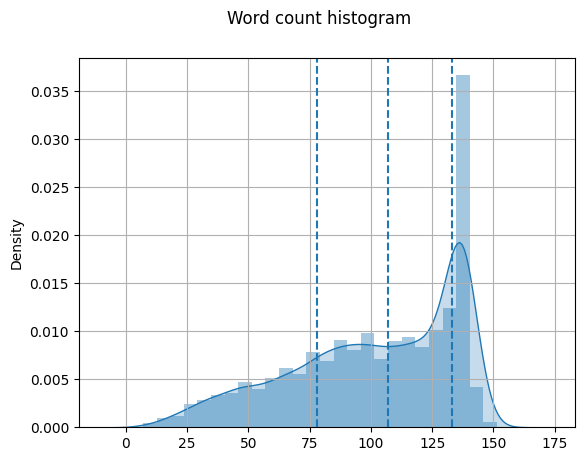

In [26]:
sns.distplot(df_train['tweet_len'].values, hist=True, kde=True, kde_kws={"shade": True})
plt.axvline(df_train['tweet_len'].describe()['25%'], ls="--")
plt.axvline(df_train['tweet_len'].describe()['50%'], ls="--")
plt.axvline(df_train['tweet_len'].describe()['75%'], ls="--")

plt.grid()
plt.suptitle("Word count histogram")
plt.show()

See how distribution of tweet len comparasion to target value

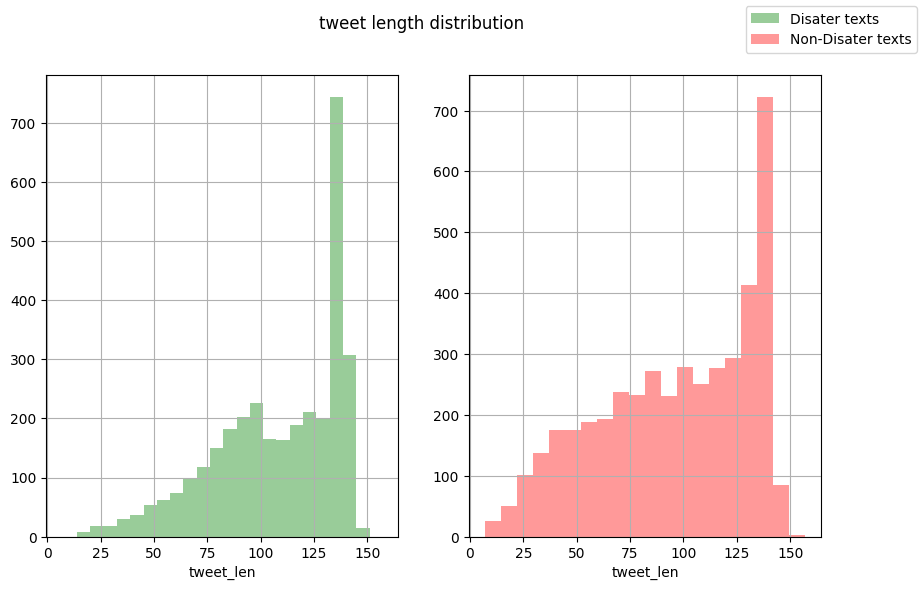

In [27]:
fig, (ax1, ax2) =  plt.subplots(1, 2, sharex=True,figsize=(10,6))
sns.distplot(df_train[(df_train['target'] == 1)]['tweet_len'], ax=ax1, kde=False, color='green',label='Disater texts')
sns.distplot(df_train[(df_train['target'] == 0)]['tweet_len'],ax=ax2, kde=False, color='red',label='Non-Disater texts');
fig.suptitle('tweet length distribution')
fig.legend(loc='upper right')
ax1.grid()
ax2.grid()
plt.show()

## Length of words in each tweet sentence

In [28]:
df_train["tweet_words_count"] = df_train["text"].str.split().apply(lambda x : len(x))
df_train.head()

,id,keyword,location,text,target,tweet_len,tweet_words_count
0,1,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1,69,13
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1,38,7
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1,133,22
3,6,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1,65,8
4,7,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1,88,16


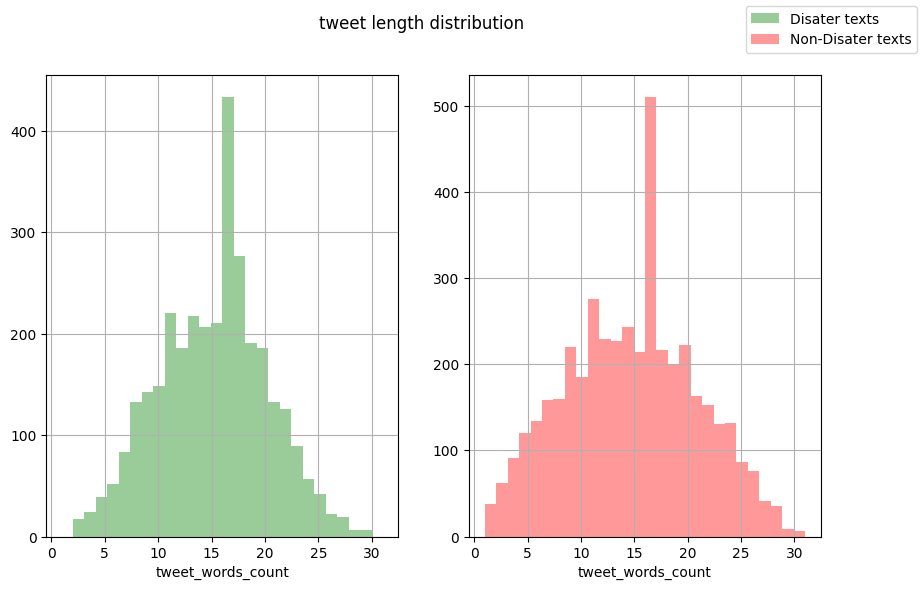

In [29]:
fig, (ax1, ax2) =  plt.subplots(1, 2, sharex=True,figsize=(10,6))
sns.distplot(df_train[(df_train['target'] == 1)]['tweet_words_count'], ax=ax1, kde=False, color='green',label='Disater texts')
sns.distplot(df_train[(df_train['target'] == 0)]['tweet_words_count'],ax=ax2, kde=False, color='red',label='Non-Disater texts');
fig.suptitle('tweet length distribution')
fig.legend(loc='upper right')
ax1.grid()
ax2.grid()
plt.show()

## Listed features need to be concerned

- tweet_len the size of text 
- tweet_words_count the number of words in each sentence
- unique_word_count number of unique words in text
- stop_word_count number of stop words in text
- url_count number of urls in text
- mean_word_length average character count in words
- char_count number of characters in text
- punctuation_count number of punctuations in text
- hashtag_count number of hashtags (#) in text
- mention_count number of mentions (@) in text

In [30]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/quochungtran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
# tweet_len 
df_train["tweet_len"] = df_train["text"].apply(lambda x : len(x))
df_test["tweet_len"]  = df_test["text"].apply(lambda x : len(x))

# tweet_words_count
df_train["tweet_words_count"] = df_train["text"].str.split().apply(lambda x : len(x))
df_test["tweet_words_count"] = df_test["text"].str.split().apply(lambda x : len(x))

# unique_word_count
df_train['unique_word_count'] = df_train['text'].apply(lambda x : len(set(str(x).split())))
df_test['unique_word_count']  = df_test['text'].apply(lambda x : len(str(x).split()))  

# stop_word_count 
df_train['stop_word_count'] = df_train['text'].apply(lambda x : len(set([w for w in str(x).lower().split() if w in stop_words])))
df_test['stop_word_count']  = df_test['text'].apply(lambda x : len(set([w for w in str(x).lower().split() if w in stop_words])))

# url_count
df_train['url_count'] = df_train['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
df_test['url_count'] = df_test['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

# mean_word_length
df_train['mean_word_length'] = df_train['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df_test['mean_word_length'] = df_test['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# punctuation_count
df_train['punctuation_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df_test['punctuation_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# hashtag_count
df_train['hashtag_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c == '#']))
df_test['hashtag_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c == '#']))

# mention_count
df_train['mention_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c == '@']))
df_test['mention_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c == '@']))

In [32]:
df_train.columns

Index(['id', 'keyword', 'location', 'text', 'target', 'tweet_len',
       'tweet_words_count', 'unique_word_count', 'stop_word_count',
       'url_count', 'mean_word_length', 'punctuation_count', 'hashtag_count',
       'mention_count'],
      dtype='object')

Let's take an overview for each meta features.

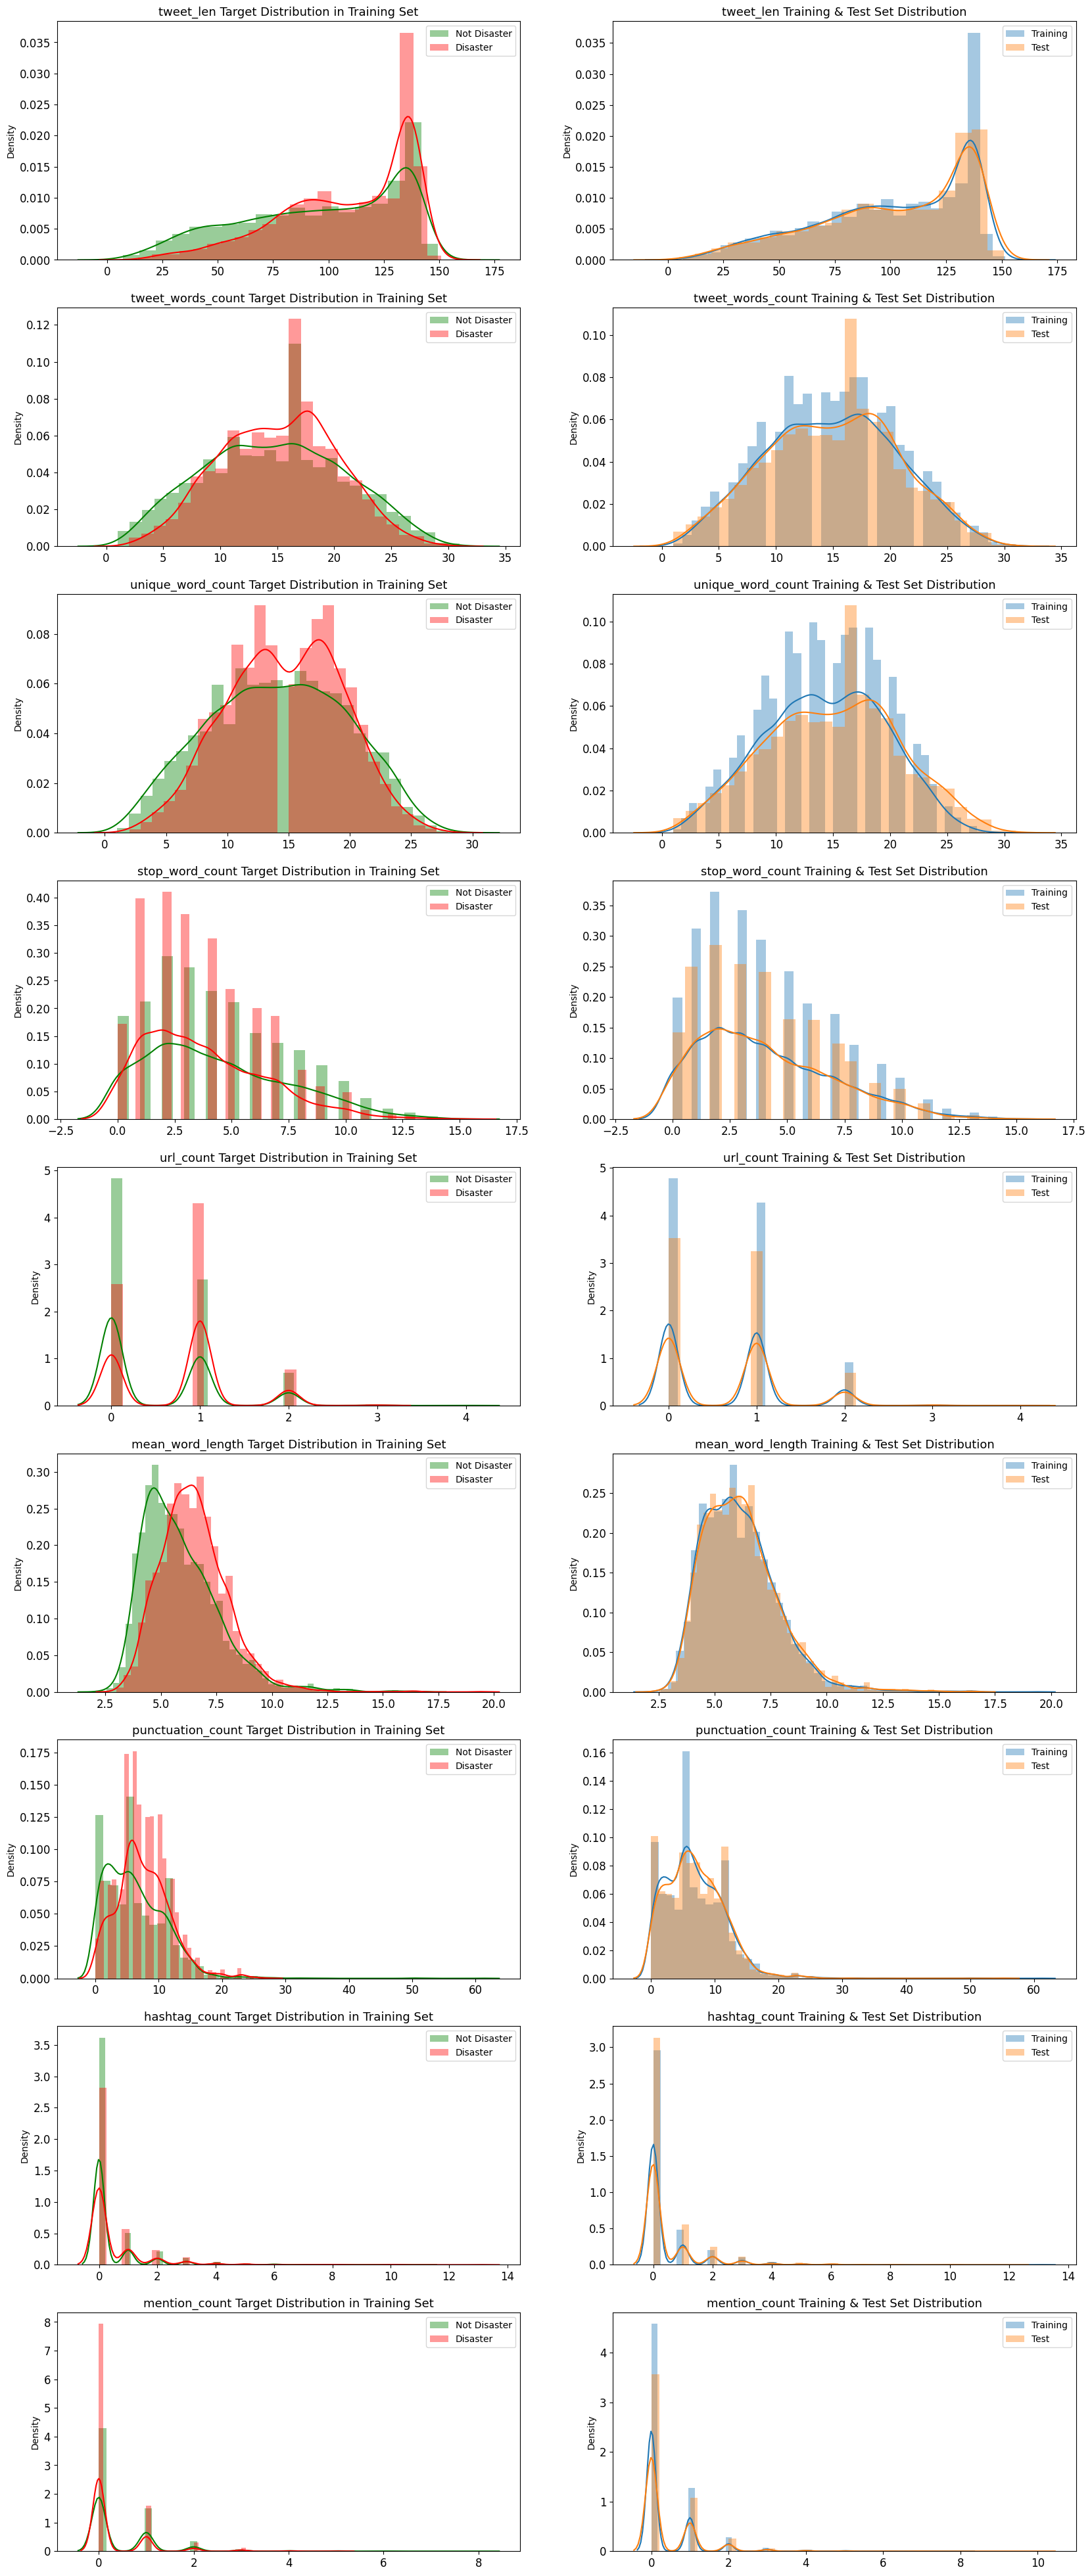

In [33]:
METAFEATURES = ['tweet_len', 'tweet_words_count', 'unique_word_count', 'stop_word_count', 'url_count', 'mean_word_length',
                'punctuation_count', 'hashtag_count', 'mention_count']

DISASTER_TWEETS = (df_train['target'] == 1)

#---------------------------------------------------------------------------------------------------------------------------

fig, axes = plt.subplots(ncols=2, nrows=len(METAFEATURES), figsize=(20, 50), dpi=100)

for i, feature in enumerate(METAFEATURES):
    sns.distplot(df_train.loc[~DISASTER_TWEETS][feature], label='Not Disaster', ax=axes[i][0], color='green')
    sns.distplot(df_train.loc[DISASTER_TWEETS][feature], label='Disaster', ax=axes[i][0], color='red')

    sns.distplot(df_train[feature], label='Training', ax=axes[i][1])
    sns.distplot(df_test[feature], label='Test', ax=axes[i][1])
    
    for j in range(2):
        axes[i][j].set_xlabel('')
        axes[i][j].tick_params(axis='x', labelsize=12)
        axes[i][j].tick_params(axis='y', labelsize=12)
        axes[i][j].legend()
    
    axes[i][0].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
    axes[i][1].set_title(f'{feature} Training & Test Set Distribution', fontsize=13)

plt.show()

Remark : 

- All of the meta features have very similar distribution in training and test set which also proves that training and test set
are taken from the same sample.

- On the other hand, tweet len and tweet words count, unique_word_count, stop_word_count, mean_word_length, punctuation_count have very different distributions for disaster and non-disaster tweets. Those features might be useful in models.

# Visualizing the Words from the Description Column


In [34]:
!pip install wordcloud

In [35]:
from wordcloud import WordCloud , STOPWORDS
cloud1 = WordCloud(stopwords =STOPWORDS, background_color='white',min_word_length=2,random_state= 53).generate(str(df_train[df_train.target==1]['text'].values))
cloud2 = WordCloud(stopwords =STOPWORDS, background_color='white',min_word_length=2,random_state= 53).generate(str(df_train[df_train.target==0]['text'].values))

In [36]:
cloud1.words_
for key in cloud1.words_.keys():
    if cloud2.words_.get(key,False):
        if cloud2.words_.get(key,None)> 0.4 and cloud1.words_.get(key,None) > 0.4:
            print(f'{key:10} {round(cloud1.words_[key],2):10}{round(cloud2.words_[key],2):10}')

co                1.0       1.0


Text(0.5, 1.0, 'Not Disaster')

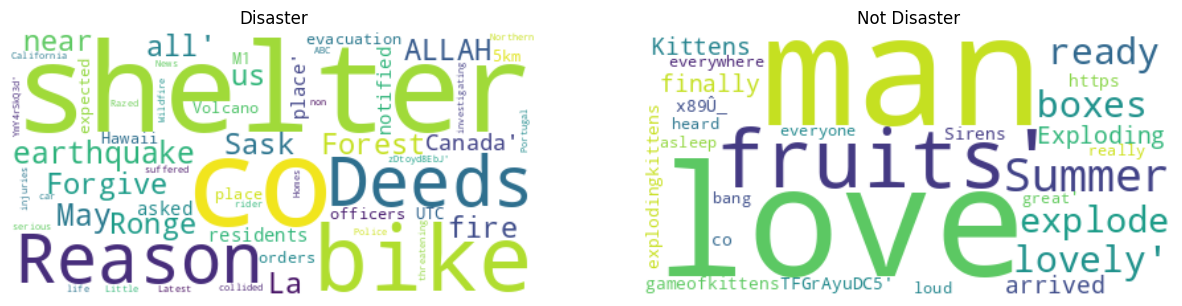

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))

ax1.imshow(cloud1, interpolation = 'bilinear')
ax1.axis('off')
ax1.set_title("Disaster")

ax2.imshow(cloud2, interpolation = 'bilinear')
ax2.axis('off')
ax2.set_title("Not Disaster")

The word clouds provide a visual representation of the most commonly used words in the 'text' column for the 'Disaster' and 'Not Disaster'. The comparison of the two word clouds also gives some insight into the common themes or words used in both genres.

# Target and N-Grams

In nlp, n-grams is the a contiguous sequence of n items from a given sample of text or speech,
where n is an arbitrary number. For example, in a bigram (n = 2), each item is a pair consecutive words 
in a text, while a trigram (n=3), each item is triple of consecutive words.

N-grams are used to capture the context in which words appear in text, and are often used as features in text classification, language modeling, and other tasks in natural language processing.



In [38]:
def generate_ngrams(text, n_gram=1):
    token=[token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

In [39]:
from collections import defaultdict


N = 100

# Unigrams 
disaster_unigrams  = defaultdict(int)
nondisaster_unigrams = defaultdict(int)

for tweet in df_train[DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet):
        disaster_unigrams[word] += 1
    
for tweet in df_train[~DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet):
        nondisaster_unigrams[word] += 1

df_disaster_unigrams    = pd.DataFrame(sorted(disaster_unigrams.items(), key=lambda x:x[1])[::-1]).rename(columns={0:'n_grams', 1:'count'})
df_nondisaster_unigrams = pd.DataFrame(sorted(nondisaster_unigrams.items(), key=lambda x:x[1] )[::-1]).rename(columns={0:'n_grams', 1:'count'})

# Bigrams

disaster_bigrams    = defaultdict(int)
nondisaster_bigrams = defaultdict(int)

for tweet in df_train[DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        disaster_bigrams[word] += 1
    
for tweet in df_train[~DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        nondisaster_bigrams[word] += 1

df_disaster_bigrams    = pd.DataFrame(sorted(disaster_bigrams.items(), key=lambda x:x[1])[::-1]).rename(columns={0:'n_grams', 1:'count'})
df_nondisaster_bigrams = pd.DataFrame(sorted(nondisaster_bigrams.items(), key=lambda x:x[1] )[::-1]).rename(columns={0:'n_grams', 1:'count'})


# Trigrams

disaster_trigrams    = defaultdict(int)
nondisaster_trigrams = defaultdict(int)

for tweet in df_train[DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        disaster_trigrams[word] += 1
    
for tweet in df_train[~DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        nondisaster_trigrams[word] += 1

df_disaster_trigrams    = pd.DataFrame(sorted(disaster_trigrams.items(), key=lambda x:x[1])[::-1]).rename(columns={0:'n_grams', 1:'count'})
df_nondisaster_trigrams = pd.DataFrame(sorted(nondisaster_trigrams.items(), key=lambda x:x[1] )[::-1]).rename(columns={0:'n_grams', 1:'count'})

## Unigram

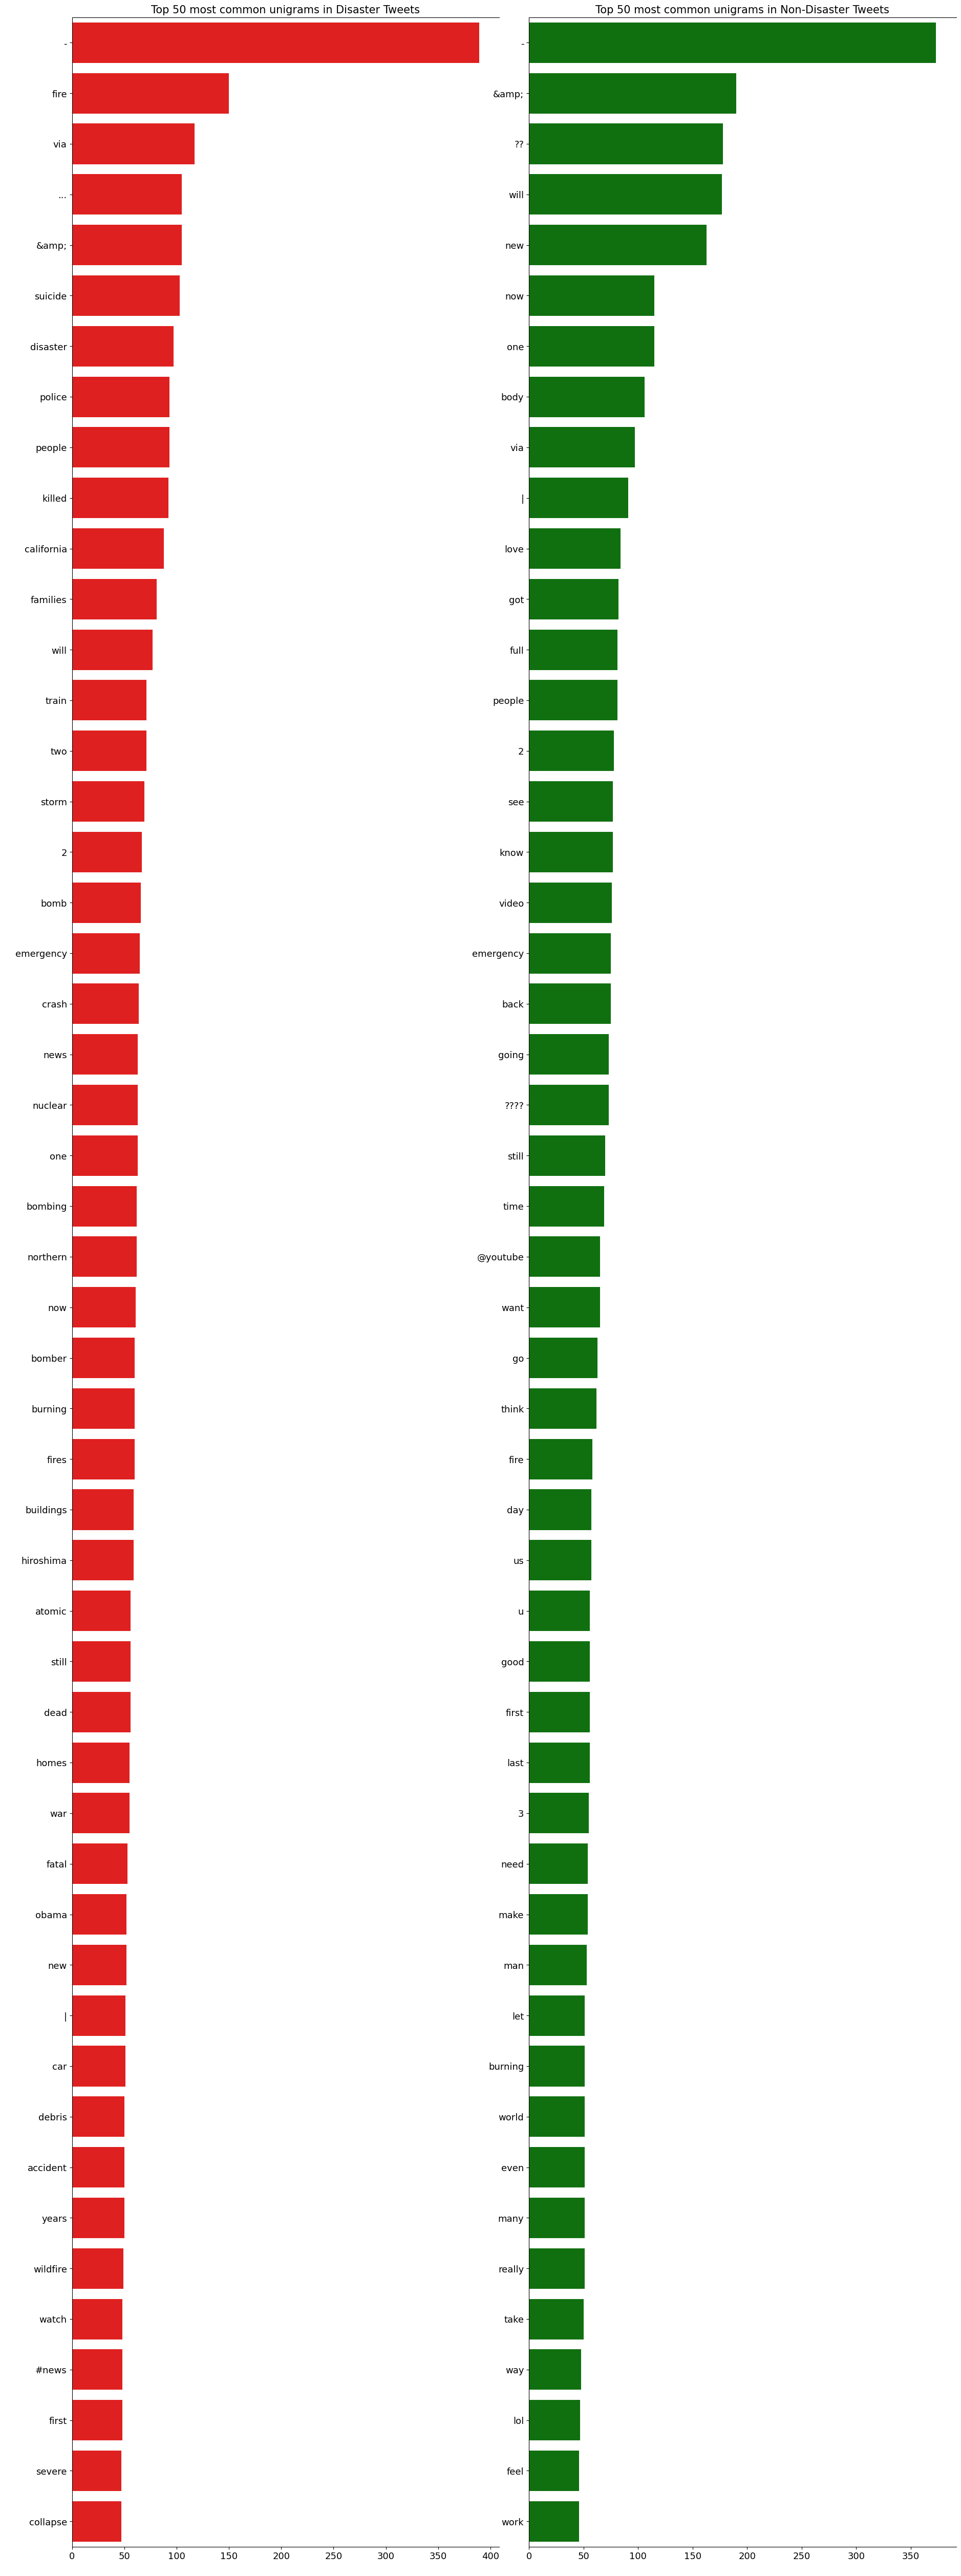

In [40]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 50), dpi=100)
plt.tight_layout()

N = 50

sns.barplot(y = df_disaster_unigrams['n_grams'].values[:N],    x = df_disaster_unigrams['count'].values[:N], ax=axes[0], color = 'red')
sns.barplot(y = df_nondisaster_unigrams['n_grams'].values[:N], x = df_nondisaster_unigrams['count'].values[:N], ax = axes[1], color = 'green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel(' ')
    axes[i].set_ylabel(' ')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common unigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common unigrams in Non-Disaster Tweets', fontsize=15)
plt.show()

## Bigrams 

There are no common bigrams exists in both classes because the context is clearer

- Most common bigrams in disaster tweets are giving more info about the disasters than unigrams, but punctations have to be stripped from words. 
- Most common bigrams in non-disaster tweets are on reddit and youtube, anf they contain lots of punctation. Those puntations have to be cleaned out of words as well.  

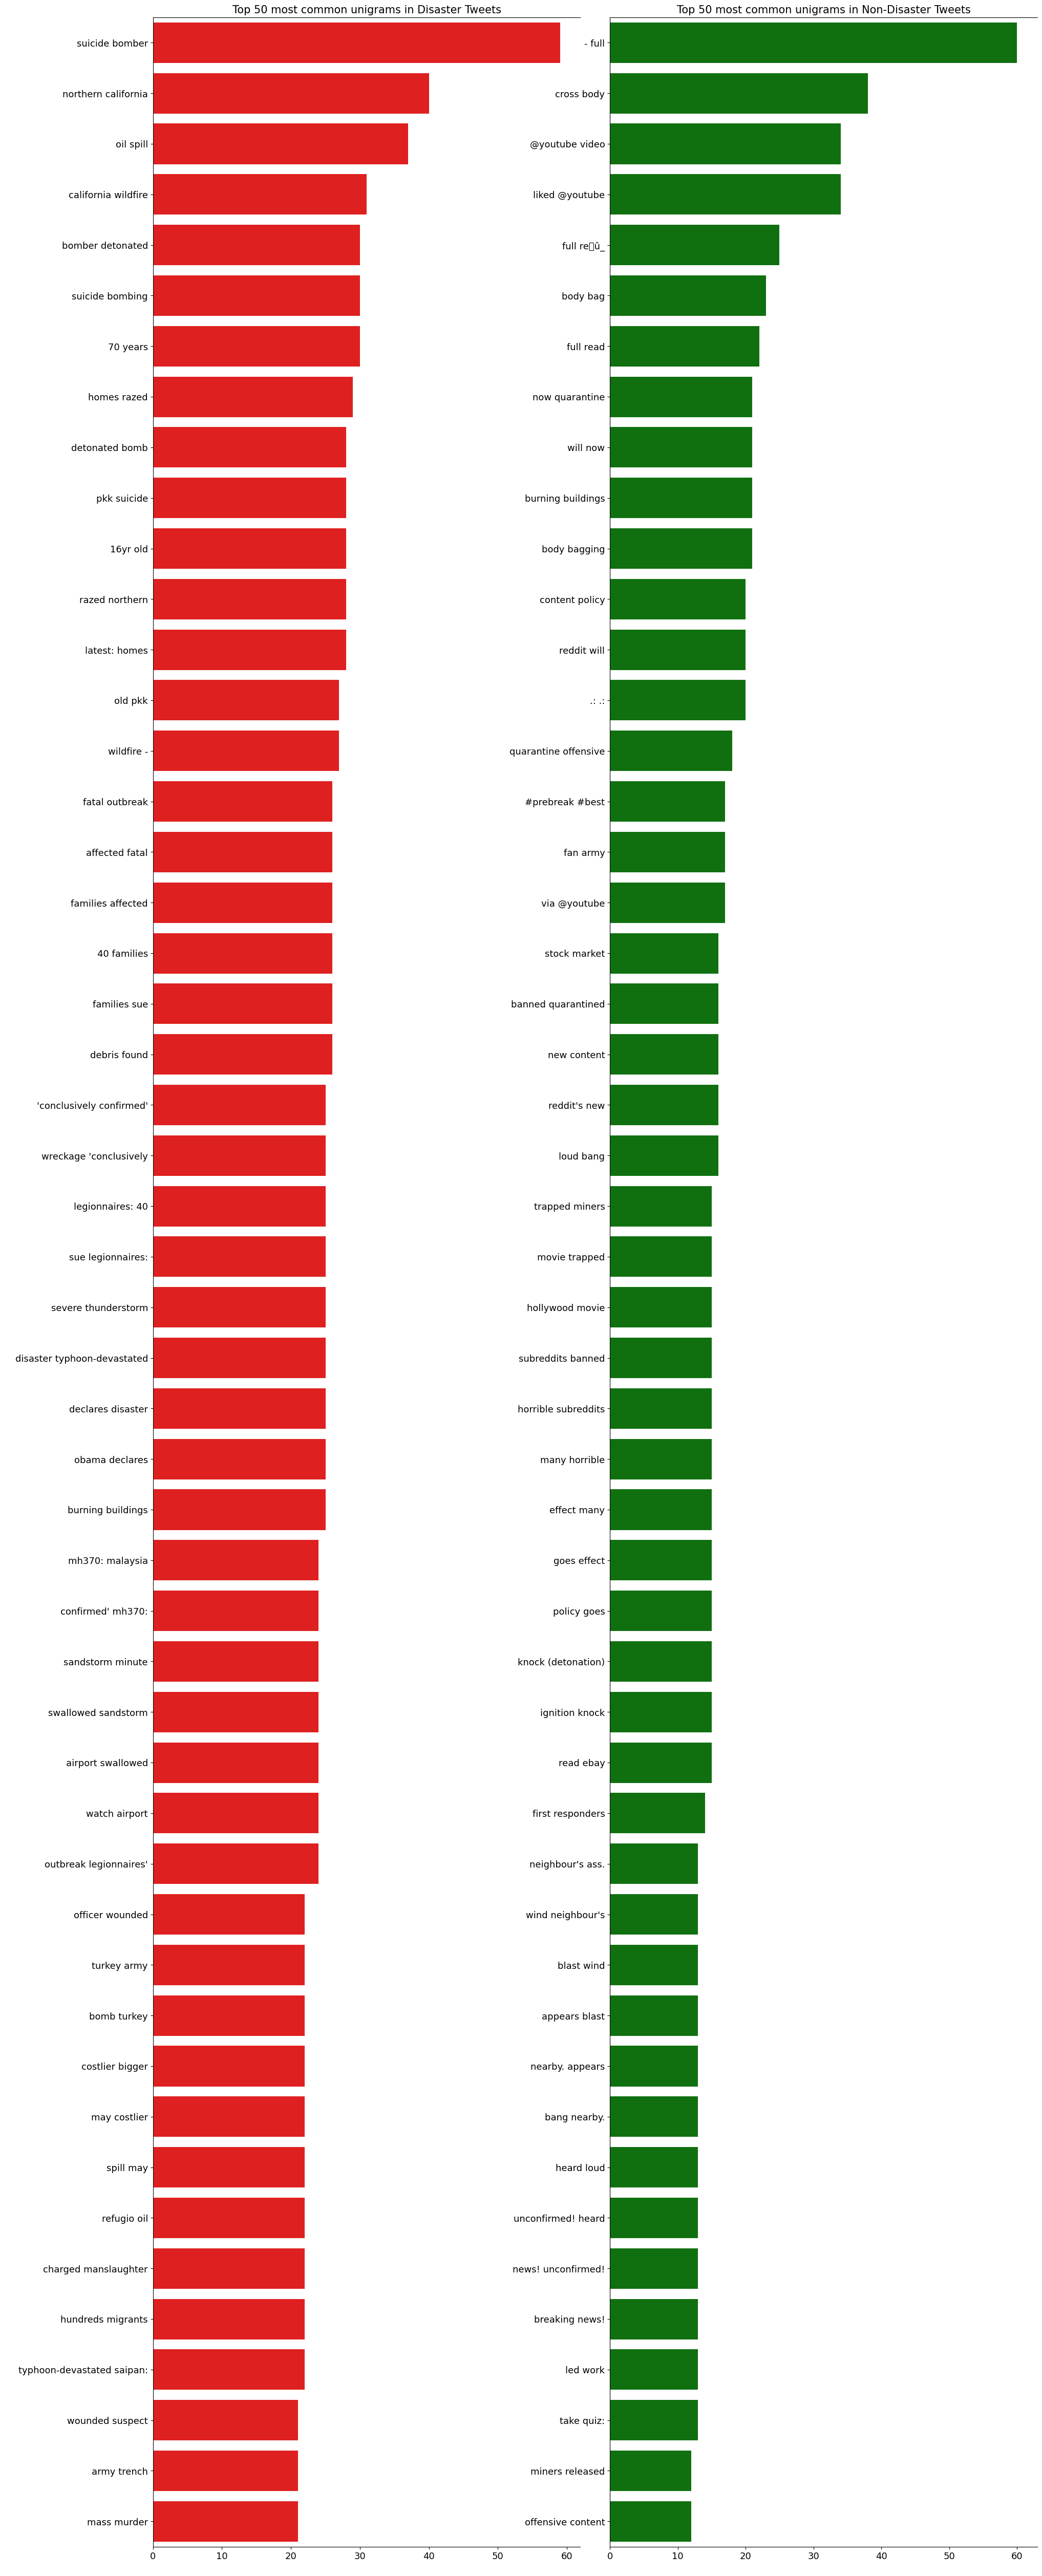

In [41]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 50), dpi=100)
plt.tight_layout()

N = 50

sns.barplot(y = df_disaster_bigrams['n_grams'].values[:N],    x = df_disaster_bigrams['count'].values[:N], ax=axes[0], color = 'red')
sns.barplot(y = df_nondisaster_bigrams['n_grams'].values[:N], x = df_nondisaster_bigrams['count'].values[:N], ax = axes[1], color = 'green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel(' ')
    axes[i].set_ylabel(' ')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common unigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common unigrams in Non-Disaster Tweets', fontsize=15)
plt.show()

## Trigrams 

There are no common trigrams exist in both classes because the context is clearer.

- Most common trigrams in disaster tweets are very similar to bigrams. They give lots of information about disasters, but they may not provide any additional information along with bigrams.

- Most common trigrams in non-disaster tweets are also very similar to bigrams, and they contain even more punctuations.

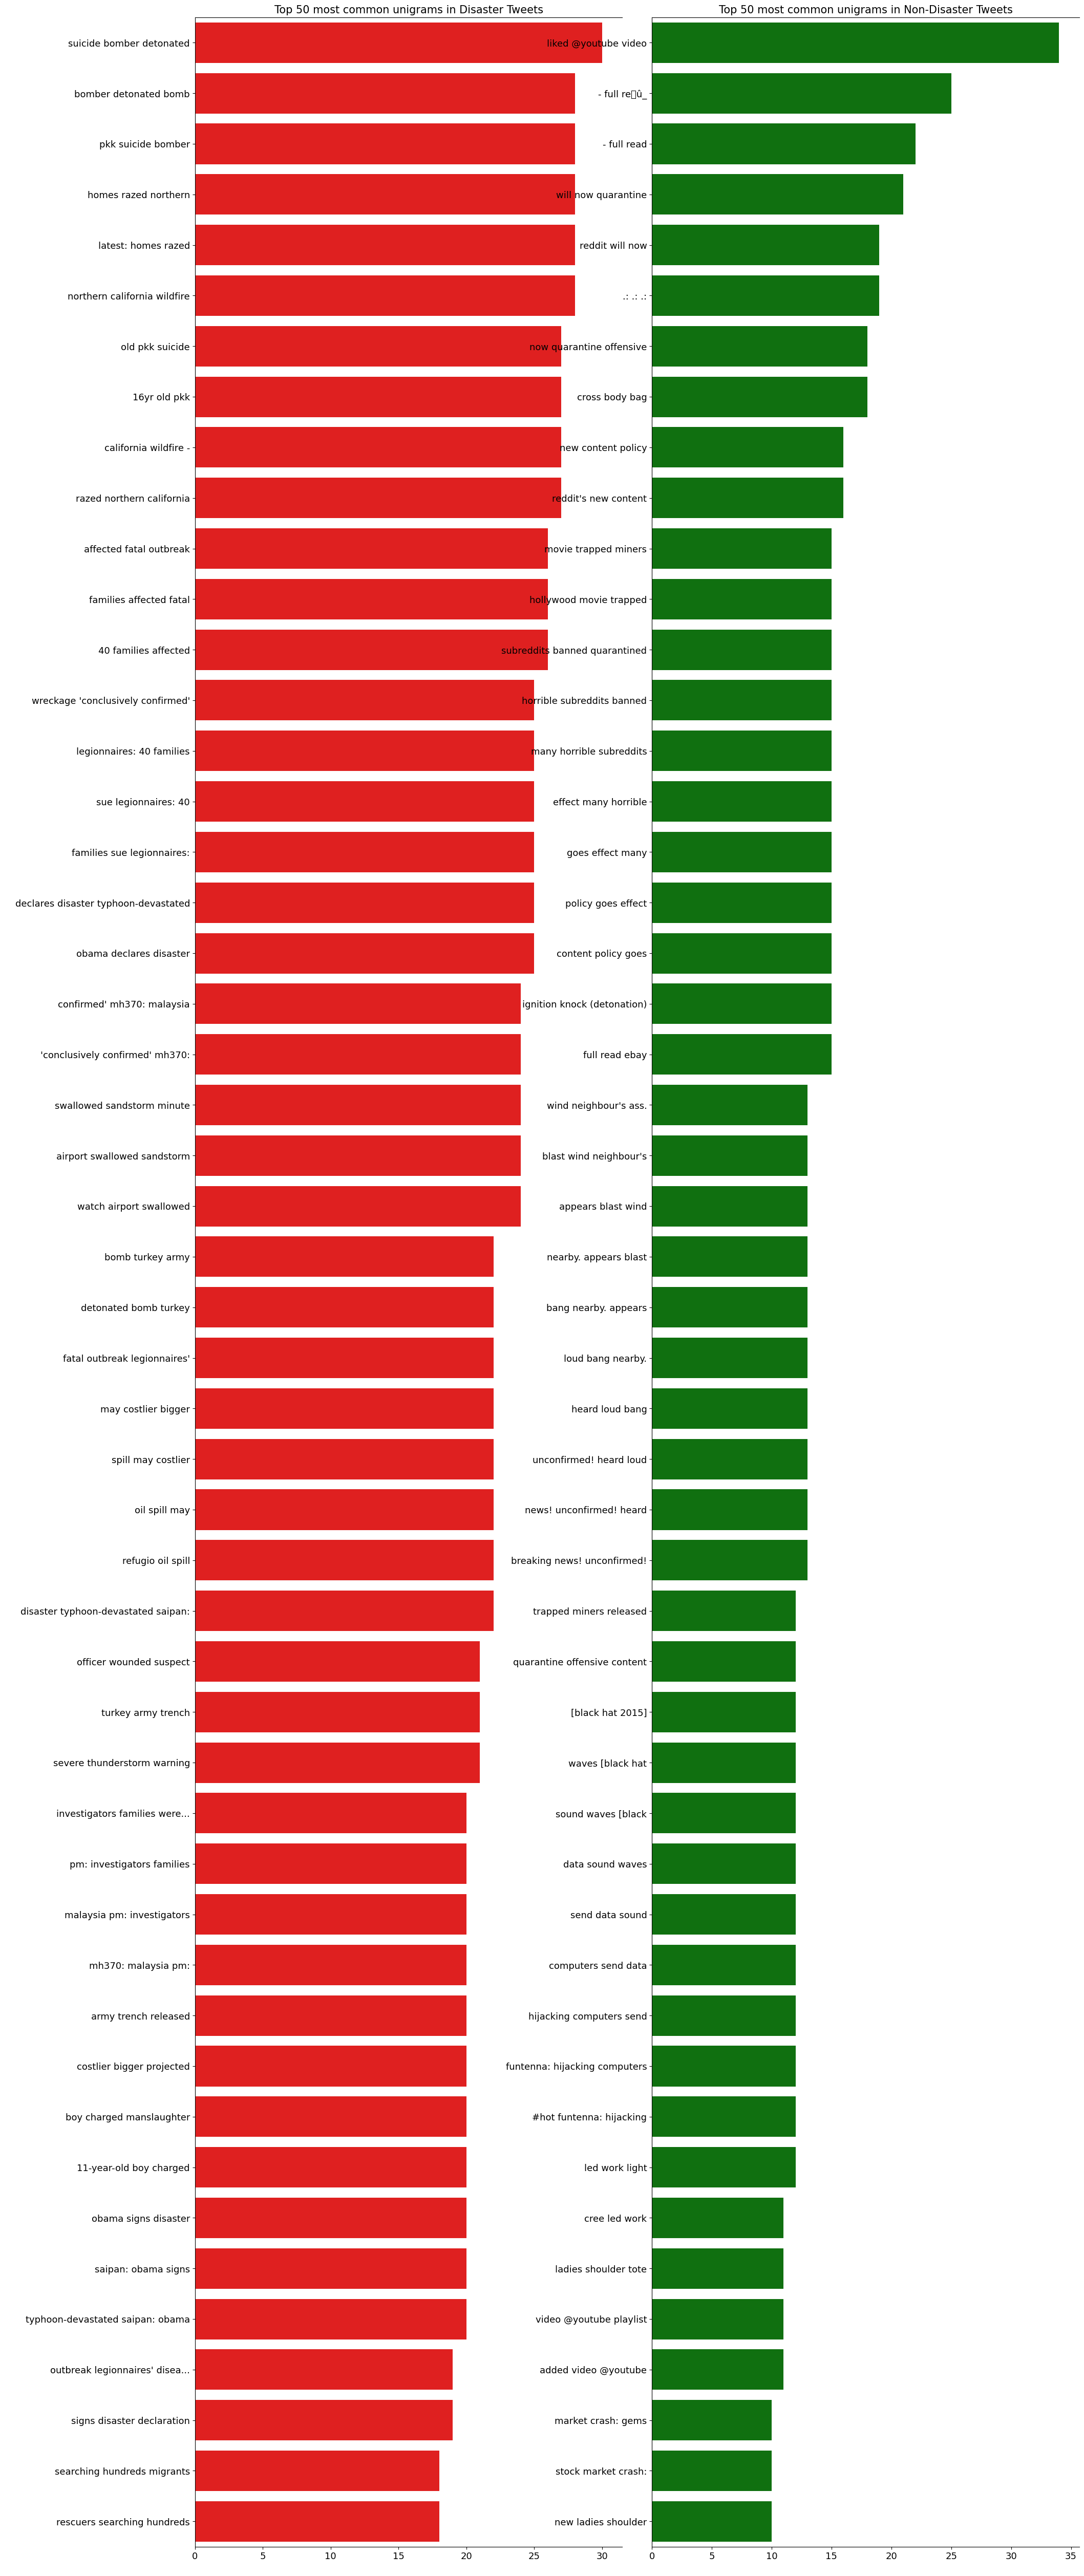

In [42]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 50), dpi=100)
plt.tight_layout()

N = 50

sns.barplot(y = df_disaster_trigrams['n_grams'].values[:N],    x = df_disaster_trigrams['count'].values[:N],    ax=axes[0]  , color = 'red')
sns.barplot(y = df_nondisaster_trigrams['n_grams'].values[:N], x = df_nondisaster_trigrams['count'].values[:N], ax=axes[1], color = 'green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel(' ')
    axes[i].set_ylabel(' ')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common unigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common unigrams in Non-Disaster Tweets', fontsize=15)
plt.show()

# Embeddings and text cleaning

## Embeddings coverage

When you have pre-trained embeddings, doing standard preprocessing steps might not be a good idea because some of the valuable information can be lost. It is better to get vocabulary as close to embeddings as possible. In order to do that, train vocab and test vocab are created by counting the words in tweets.


Text cleaning is based on the embeddings below:

- GloVe-300d-840B
- FastText-Crawl-300d-2M

## Text Cleaning

Tweets require lots of cleaning but it is inefficient to clean every single tweet because that would consume too much time. A general approach must be implemented for cleaning.

- The most common type of words that require cleaning in oov have punctuations at the start or end. Those words doesn't have embeddings because of the trailing punctuations. Punctuations #, @, !, ?, +, &, -, $, =, <, >, |, {, }, ^, ', (, ),[, ], *, %, ..., ', ., :, ; are separated from words

- Special characters that are attached to words are removed completely

- Contractions are expanded

- Urls are removed

- Character entity references are replaced with their actual symbols

- Typos and slang are corrected, and informal abbreviations are written in their long forms

- Some words are replaced with their acronyms and some words are grouped into one

- Finally, hashtags and usernames contain lots of information about the context but they are written without spaces in between words so they don't have embeddings. Informational usernames and hashtags should be expanded but there are too many of them. I expanded as many as I could, but it takes too much time to run clean function after adding those replace calls.

In [43]:
from src.text_preprocessing import cleaning_text

In [44]:
df_train['cleaned_text'] = df_train['text'].apply(lambda s : cleaning_text(s))
df_test['cleaned_text']  = df_test['text'].apply(lambda s : cleaning_text(s))

In [45]:
nb_sen = 99
print('original text : ', df_train['text'][nb_sen])
print('cleaned text  : ', df_train['cleaned_text'][nb_sen])

original text :  only had a car for not even a week and got in a fucking car accident .. Mfs can't fucking drive .
cleaned text  :  only had a car for not even a week and got in a fucking car accident  .  .  Mfs cannot fucking drive  . 


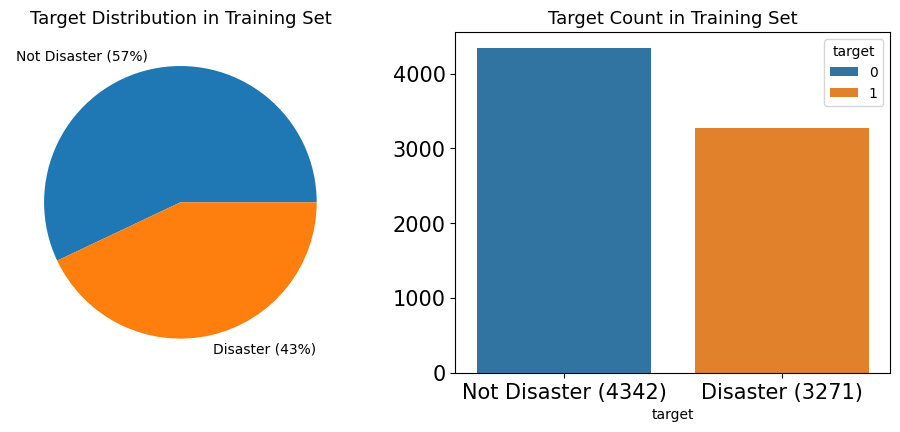

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), dpi=100)
plt.tight_layout()

df_train.groupby('target').count()['id'].plot(kind='pie', ax=axes[0], labels=['Not Disaster (57%)', 'Disaster (43%)'])
sns.countplot(x=df_train['target'], hue=df_train['target'], ax=axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Not Disaster (4342)', 'Disaster (3271)'])
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Target Distribution in Training Set', fontsize=13)
axes[1].set_title('Target Count in Training Set', fontsize=13)

plt.show()
